In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import text_utils

X_test = pd.read_csv("X_test.csv", index_col=0)
X_train = pd.read_csv("X_train.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
df = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [2]:
df = text_utils.text_pre_processing(df)

cleaned text columns


## Langdetect ##

In [ ]:
# Peter 13apr2025: We could probably move this import to the top of the file
from langdetect import detect, detect_langs, DetectorFactory
DetectorFactory.seed = 0
import time # Peter 13apr2025: Apparently we do not use this import anywhere in the code.

At first we want to try if we to see the non probabilistic results

In [ ]:
def safe_detect(text, method = None):
    if method == 'detect_langs':
        try:
            return {lang.lang: lang.prob for lang in detect_langs(text)} if text.strip() else np.nan
        except:
            return np.nan
    else:
        try:
            return detect(text) if text.strip() else np.nan
        except:
            return np.nan

In [5]:
df['merged_langdetect'] = df['merged_text'].apply(lambda text: safe_detect(text))

In [6]:
df = df[['productid', 'imageid', 'prdtypecode', 'bool_description',
         'merged_text', 'merged_langdetect']]

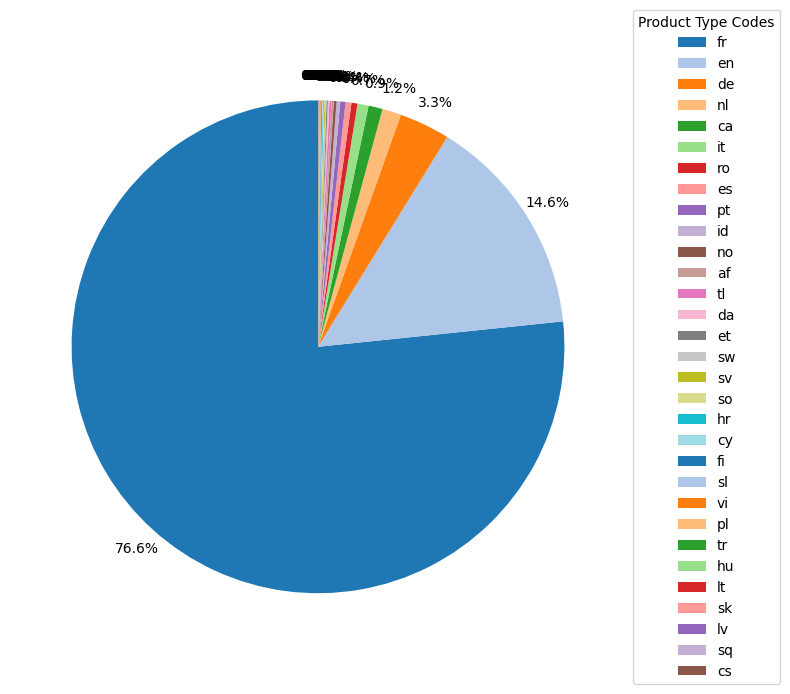

In [ ]:
languages_counts = df['merged_langdetect'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    languages_counts,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,
    colors=plt.cm.tab20.colors,  # Use colormap
    textprops={'fontsize': 10},  # Adjust font size for better readability
    pctdistance=1.1  # Move percentages outside the pie
)

# Add a legend outside the pie chart
ax.legend(
    wedges,
    languages_counts.index,  # Labels for the legend
    title="Languages",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Position legend outside the chart
    fontsize=10
)
plt.show()

In [ ]:
# getting some number to evaluate localization strategies
not_french_characters = int(df.loc[~df['merged_langdetect'].isin(['fr'])]['merged_text'].str.len().sum())
not_english_characters = int(df.loc[~df['merged_langdetect'].isin(['en'])]['merged_text'].str.len().sum())
all_characters = int(df['merged_text'].str.len().sum())

DeepL_free_limit = 500000

print('Looking at the characters we see that...')
print(f'\t{not_french_characters/all_characters:.2%} are not classified as French.')
print(f'\t{not_english_characters/all_characters:.2%} are not classified as English.', end='\n\n')

print(f'We have {not_french_characters:,} non French characters.\n\tAssuming that we use a free account of DeepL we would need {not_french_characters//DeepL_free_limit+1} accounts or months to localize everything into French')
print(f'We have {not_english_characters:,} non English characters.\n\tAssuming that we use a free account of DeepL we would need {not_english_characters//DeepL_free_limit+1} accounts or months to localize everything into English', end='\n\n')

If we look at the characters we see that 7.70%% are not classified as French
If we look at the characters we see that 93.27% are not classified as English
We have 3,447,452 non French characters. Assuming that we use a free account of DeepL we would need 7 accounts or months to localize everything into French
We have 41,771,915 non English characters. Assuming that we use a free account of DeepL we would need 84 accounts or months to localize everything into English


In [66]:
df['merged_langdetect_lower_case'] = df['merged_text'].apply(lambda text: safe_detect(text.lower()))

In [67]:
# getting some number to evaluate localization strategies
not_french_characters = int(df.loc[~df['merged_langdetect_lower_case'].isin(['fr'])]['merged_text'].str.len().sum())
not_english_characters = int(df.loc[~df['merged_langdetect_lower_case'].isin(['en'])]['merged_text'].str.len().sum())
all_characters = int(df['merged_text'].str.len().sum())

DeepL_free_limit = 500000

print(f'If we look at the characters we see that {not_french_characters/all_characters:.2%}% are not classified as French')
print(f'If we look at the characters we see that {not_english_characters/all_characters:.2%} are not classified as English')

print(f'We have {not_french_characters:,} non French characters. Assuming that we use a free account of DeepL we would need {not_french_characters//DeepL_free_limit+1} accounts or months to localize everything into French')
print(f'We have {not_english_characters:,} non English characters. Assuming that we use a free account of DeepL we would need {not_english_characters//DeepL_free_limit+1} accounts or months to localize everything into English')

If we look at the characters we see that 6.88%% are not classified as French
If we look at the characters we see that 93.89% are not classified as English
We have 3,076,142 non French characters. Assuming that we use a free account of DeepL we would need 7 accounts or months to localize everything into French
We have 41,967,781 non English characters. Assuming that we use a free account of DeepL we would need 84 accounts or months to localize everything into English


In [68]:
# Taking a look at the first 30 Dutch and Afrikaans results we see that we have a one Dutch result. "Smilla's Gevoel Voor Sneeuw"  The rest could be French.
df.loc[df['merged_langdetect_lower_case'].isin(['nl','af'])].head()

,productid,imageid,prdtypecode,bool_description,merged_text,merged_langdetect,merged_langdetect_lower_case
74,1989328275,1118919143,2403,0,Lot 3 Livres Partitions - Hector L'apprenti Mu...,nl,nl
131,1807806498,1204663650,10,0,Dr. Mercurius' Heilsame Reise Zum Planeten Erde,de,nl
228,57150024,684348064,1160,0,Dragon Ball Power Level Z N°598,en,nl
486,3366054807,1209157203,50,0,Gelshell Wand Silicone Skin Vert Pour Htc Vive,de,af
513,830324073,1295451889,10,0,Sherwood G: Pedigree Register Vol. 2,de,af


In [9]:
df.to_csv('language_analysis/df_langdetect.csv')

In [ ]:
df = pd.read_csv('language_analysis/df_langdetect.csv')

In [4]:
df.head()

,Unnamed: 0,designation_cleaned,description_cleaned,designation_org_clean,designation_spaces,designation_upper,designation_lower,designation_html_tag,designation_html_entity,designation_encoding_issue,designation_control_chars,description_org_clean,description_spaces,description_upper,description_lower,description_html_tag,description_html_entity,description_encoding_issue,description_control_chars
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,4,La Guerre Des Tuques,Luc a des idées de grandeur. Il veut organiser...,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [3]:
df['text_length'] = df.merged_text.str.len()

AttributeError: 'DataFrame' object has no attribute 'merged_text'

In [ ]:
# Taking a look at the first 30 German results we can see that most of them are misclassified and are in fact French
#df.loc[df['merged_langdetect'].isin(['de'])].sort_values(by = df['text_length'], ascending=True)

x_list = []

for x in df.loc[df['merged_langdetect'].isin(['en'])]['merged_text']:
    x_list.append(x)

x_list_short = x_list[0:10]

print(f'Give me a Python dictionary with the 2 letter language codes for the following list of products: {x_list_short}')
 

give me a python dictionary with the 2 letter language codes for the following ist of products: ['Eames Inspired Sxw Chair - Pink - BlackThe timeless DSW seat can now be paired with more types of legs! These wood legs look like a natural fit for the seat and will make a safe choice for any interior. This chair will be perfect in offices kitchens and dining rooms. Ideal for : kitchen Living room office waiting room or reception Available Colours : white red blue baby blue black yellow orange olive dark orange chocolate light green warm grey beige light grey blue ocean pink fushia green tree graphite tarmac and royal blue Other Features : avalaible with or without amrests.', 'pCan my 2-year-old play a game? Yes Each game in our 2 year old collection is designed so that your child will experience what its like to take turns play within the rules (even loosely) and possibly learn a new skill like rolling a die. Unlike games for older children however you dont win or lose any of these game 

In [ ]:
x_list_short = x_list[10:30]
prompt = f'Give me a Python dictionary with the 2 letter language codes for the following list of products: {x_list_short}'


'give me a python dictionary with the 2 letter language codes for the following ist of products: [\'Fate/Zero - Lot Mangas - Tome 1 À 5\', "Maquette D\'avion Protective Silicone Cover Case With Lanyard For Dji Osmo Pocket Handheld Gimbal Scy90304102wh-GénériqueSilicone CoverCase With Handheld Lanyard For DJI OSMO Pocket Protective AccessoriesFeatures:100% brand new and highquality.Protect fuselage anytimeand anywhere to prevent foreign body collision and scratch fuselagePrecision hole positionreserved microphone hole and TYPE-C jack at the bottom to ensure beautifuland protective functions without affecting the use.Hanging rope hole designwith the use of hanging rope to prevent loss and loss more convenient andmore secureMultifunctional hangingrope can be used as wrist rope alone can also be connected when hangingrope around the neck the length can be adjusted.Made of superior materialdurable to useCould protect the handleand is long lastingEasy to installNon-slip and dustproofSpecific

Call Gemini on strings that are not recoginzed as French to double check.

In [ ]:
# some manual rules to identify some more French 
df.loc[(df['merged_text'].str.startswith("NOTE :", na=False)) & (~df['merged_langdetect'].isin(['fr'])), 'merged_langdetect'] = 'fr'
df.loc[(df['merged_text'].str.startswith("NOTE :, na=False")) & (~df['merged_langdetect'].isin(['fr'])), 'merged_langdetect'] = 'fr'


In [12]:
df.head()

,productid,imageid,prdtypecode,bool_description,merged_text,merged_langdetect
0,3804725264,1263597046,10,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,de
1,436067568,1008141237,2280,0,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,fr
2,201115110,938777978,50,1,PILOT STYLE Touch Pen de marque Speedlink est...,fr
3,50418756,457047496,1280,0,Peluche Donald - Europe - Disneyland 2000 (Mar...,de
4,278535884,1077757786,2705,1,La Guerre Des Tuques Luc a des idées de grande...,fr


In [18]:
df.sort_values(by='text_len', ascending=False)

,productid,imageid,prdtypecode,bool_description,merged_text,merged_langdetect,text_len
61512,4023550194,1277618412,1560,1,Lumineux Pvc Téléphone mobile Sac étanche cam...,fr,12128
64317,4006510427,1275646331,1281,1,Réaliste Reborn 55CM Reborn Lifelike en vinyl...,fr,9860
80661,4050860415,1281450969,1280,1,4pc étudiants Vêtements Uniforme Robe plissée...,fr,9294
47398,4053879512,1282015512,1280,1,4pc étudiants Vêtements Uniforme Robe plissée...,fr,9294
75450,2017625800,1120710643,2905,1,NOTE : Code d'activation à utiliser exclusive...,fr,9165
...,...,...,...,...,...,...,...
30570,3842953785,1252235116,2280,0,I Am Divas 4,af,13
79145,1009604987,1052973429,2462,0,Ps3 + 4 Jeux,fr,13
15223,275574461,976251551,2462,0,Ps3 + 2 Jeux,fr,13
19932,2739718595,1161560611,2403,0,Lot De 12 Bd,nl,13


In [15]:
df.head()

,productid,imageid,prdtypecode,bool_description,merged_text,merged_langdetect,text_len
0,3804725264,1263597046,10,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,de,89
1,436067568,1008141237,2280,0,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,fr,207
2,201115110,938777978,50,1,PILOT STYLE Touch Pen de marque Speedlink est...,fr,675
3,50418756,457047496,1280,0,Peluche Donald - Europe - Disneyland 2000 (Mar...,de,64
4,278535884,1077757786,2705,1,La Guerre Des Tuques Luc a des idées de grande...,fr,208


In [ ]:

import re

# Define the pattern for French characters
french_pattern = r'[éèêàâçîïôûëùîöœÉÈÊÀÂÇÎÏÔÛËÙÎÖŒ].*[éèêàâçîïôûëùîöœÉÈÊÀÂÇÎÏÔÛËÙÎÖŒ]'

# Extract texts that match the condition and contain French characters
matching_texts = [
    text for text in df.loc[ 
        (df['merged_langdetect'].isin(['en']))
    ]['merged_text'] if re.search(french_pattern, text)
]

matching_texts

["Maquette D'avion Protective Silicone Cover Case With Lanyard For Dji Osmo Pocket Handheld Gimbal Scy90304102wh-GénériqueSilicone CoverCase With Handheld Lanyard For DJI OSMO Pocket Protective AccessoriesFeatures:100% brand new and highquality.Protect fuselage anytimeand anywhere to prevent foreign body collision and scratch fuselagePrecision hole positionreserved microphone hole and TYPE-C jack at the bottom to ensure beautifuland protective functions without affecting the use.Hanging rope hole designwith the use of hanging rope to prevent loss and loss more convenient andmore secureMultifunctional hangingrope can be used as wrist rope alone can also be connected when hangingrope around the neck the length can be adjusted.Made of superior materialdurable to useCould protect the handleand is long lastingEasy to installNon-slip and dustproofSpecifications:Color: REDGRAYBLUEPurpleBlackWhiteMaterial: SiliconePackage Content:1 x Silicone Cover1 x Lanyard",
 'Lot De 5 Tés À Coller Pvc Pres

In [ ]:
df[(df['merged_text'].str.startswith('En Forme De Losange Peinture Spéciale Bricolag'))]

,productid,imageid,prdtypecode,bool_description,merged_text,merged_langdetect,merged_langdetect_lower_case,text_length
1972,3748075542,1240731354,2060,1,En Forme De Losange Peinture Spéciale Bricolag...,en,en,2117
26867,3748080245,1240744230,2060,1,En Forme De Losange Peinture Spéciale Bricolag...,en,en,2117


In [54]:
# write to csv file since process takes a while to run
df.to_csv("language_analysis/df_langdetect.csv", index=True)

/tmp/ipykernel_63675/1050273457.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")


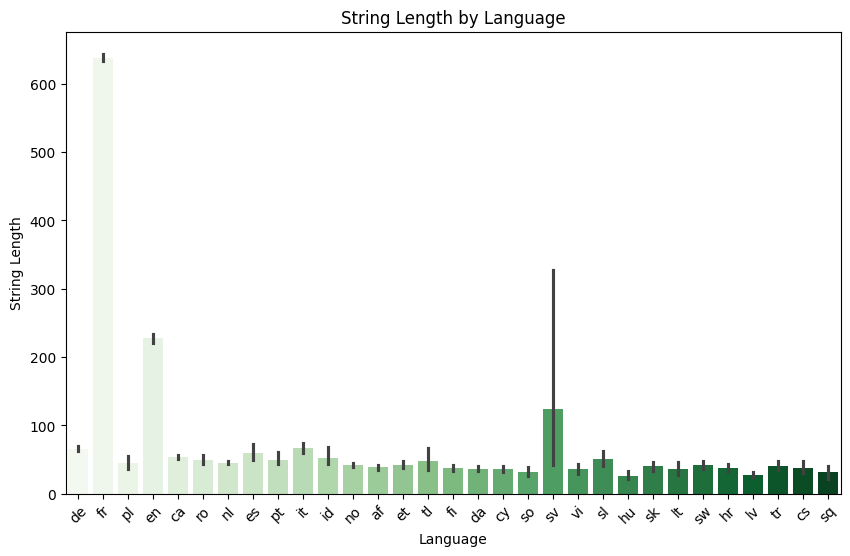

In [ ]:
# Peter 13apr2025: Matplotlib is already imported on top.
import seaborn as sns # Peter 13apr2025: We could probably move this import to the top of the file

plt.figure(figsize=(10, 6))
sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("String Length by Language")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_63675/865291184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")


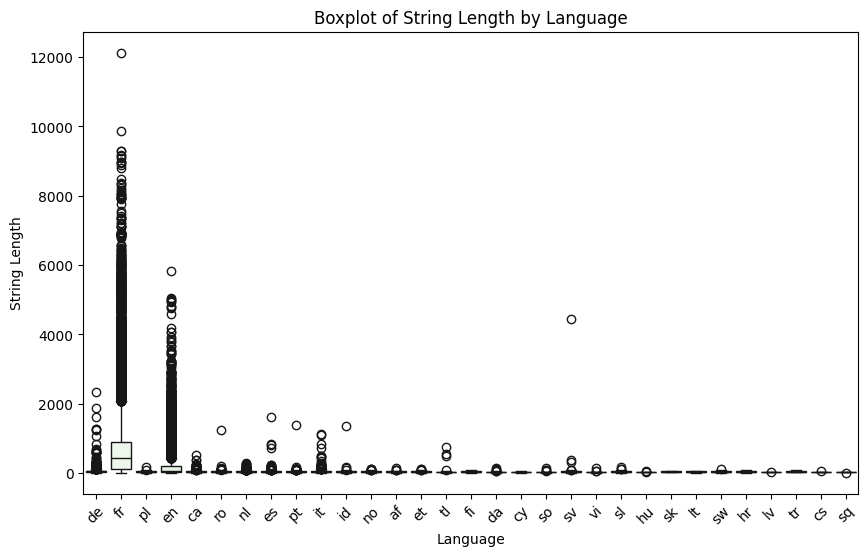

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df, palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("Boxplot of String Length by Language")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_63675/1602578785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr'])], palette="Greens")


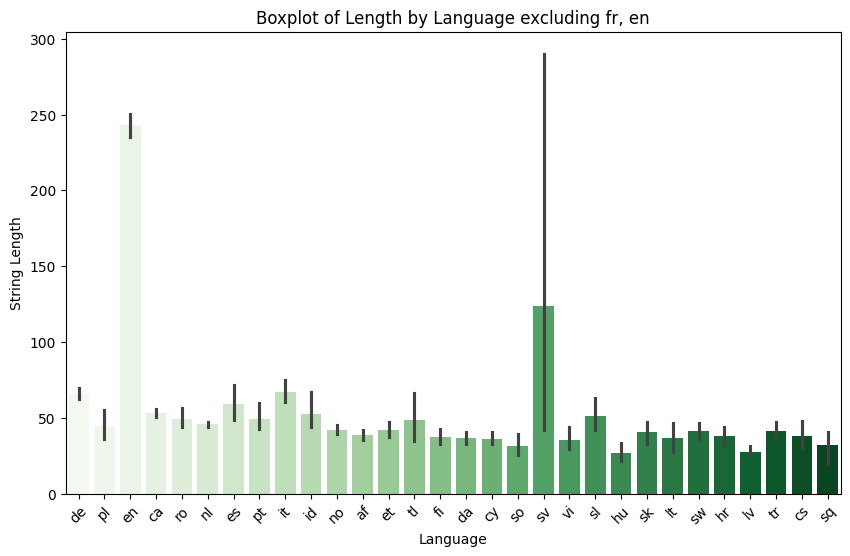

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr'])], palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("Boxplot of Length by Language excluding fr, en")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_63675/1835721691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr', 'en'])], palette="Greens")


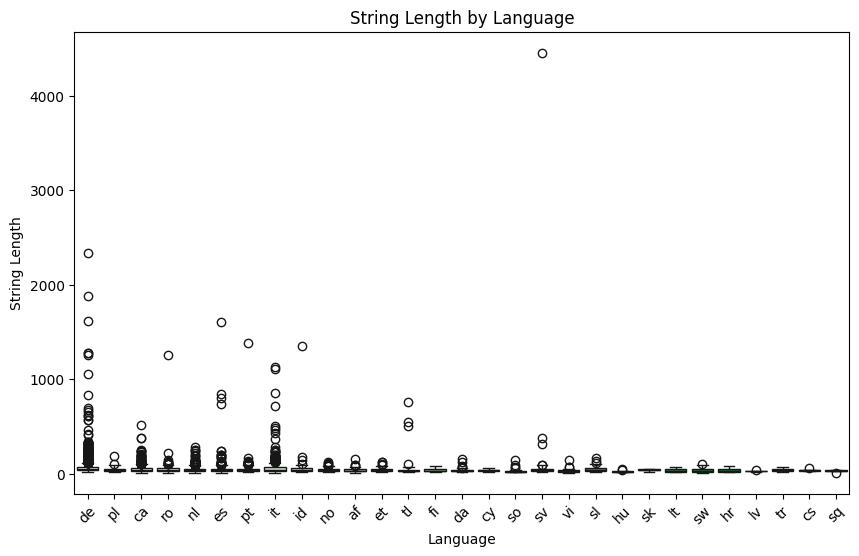

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="merged_langdetect", y=df['merged_text'].apply(len), data=df[~df['merged_langdetect'].isin(['fr', 'en'])], palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("String Length by Language")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_63675/2902357258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="merged_langdetect",  y=df['merged_text'].apply(len), data=df[df['merged_langdetect'].isin(['nl'])], palette="Greens")


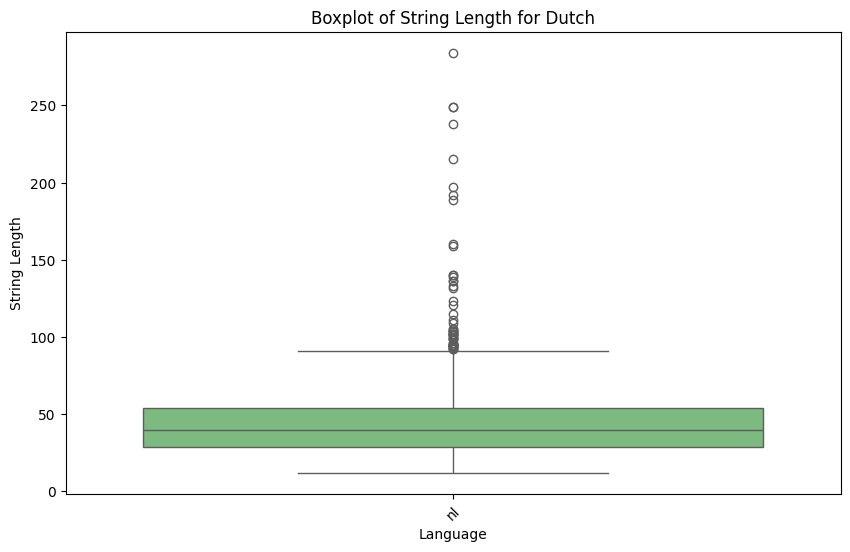

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="merged_langdetect",  y=df['merged_text'].apply(len), data=df[df['merged_langdetect'].isin(['nl'])], palette="Greens")
plt.xlabel("Language")
plt.ylabel("String Length")
plt.title("Boxplot of String Length for Dutch")
plt.xticks(rotation=45)
plt.show();

In [ ]:
freq_counts = pd.crosstab(df['prdtypecode'], df['merged_langdetect'].apply(lambda x: x if x in ['fr'] else 'other'), normalize=True)
freq_counts

merged_langdetect,fr,other
prdtypecode,,
10,0.017959,0.018736
40,0.013001,0.016534
50,0.014461,0.005335
60,0.008208,0.001590
1140,0.011494,0.019961
1160,0.017453,0.029099
1180,0.004051,0.004946
1280,0.041135,0.016216
1281,0.017193,0.007184


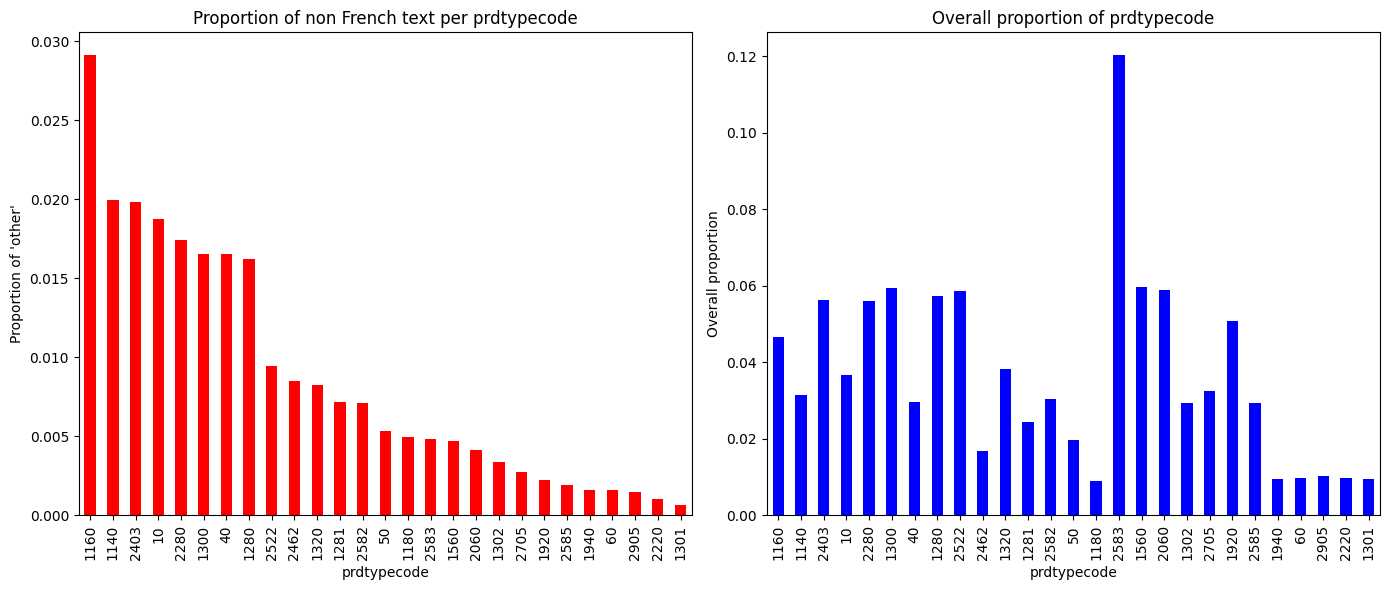

<Figure size 640x480 with 0 Axes>

In [ ]:
# Compute "other" proportion per prdtypecode
other_freq = freq_counts['other'].sort_values(ascending=False)

# Compute overall proportion of each prdtypecode
overall_freq = df['prdtypecode'].value_counts(normalize=True)

# Reindex `overall_freq` to match the order of `other_freq`
overall_freq = overall_freq.reindex(other_freq.index, fill_value=0)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Plot proportion of "other" per prdtypecode
other_freq.plot(kind="bar", color="red", ax=axes[0])
axes[0].set_title("Proportion of non French text per prdtypecode")
axes[0].set_xlabel("prdtypecode")
axes[0].set_ylabel("Proportion of 'other'")

# Plot overall proportion of each prdtypecode (same order)
overall_freq.plot(kind="bar", color="blue", ax=axes[1])
axes[1].set_title("Overall proportion of prdtypecode")
axes[1].set_xlabel("prdtypecode")
axes[1].set_ylabel("Overall proportion")

# Adjust layout
plt.tight_layout()
plt.show()
# Adjust layout
plt.tight_layout()
plt.show();
#Note that the scale of the two graphs is not the same and that the right scale is the proportion of elements that are non French or English classified 
#while the right are the distribution of entries across categories  

In [ ]:
df['text_length'] = (df['merged_text'].fillna('')).apply(len)

In [97]:
df.loc[df['merged_langdetect'] == 'en'].sort_values(by="text_length", ascending=False)

,productid,imageid,prdtypecode,bool_description,merged_text,merged_langdetect,merged_langdetect_lower_case,text_length
75425,2530425514,1147306647,2583,1,FIDJI BLANC OU NOIR - Spa fidji 2 places allon...,en,en,5829
27734,4017682069,1285868084,1300,1,S101 24 FPV Wifi 720P ?????????????? ?????? ??...,en,ca,4993
38997,3287247133,1204229301,1280,1,pdiv classaplus div classleftImage stylewidth ...,en,en,4927
51345,1711736796,1100071902,2905,1,JEU AVEC ACCÈS ANTICIPÉ Commencez à jouer dès ...,en,en,4757
74573,4160806003,1304012473,1300,1,Maquette D'avion Xp-25a Esc 5v 2a Speed ??Cont...,en,en,4191
...,...,...,...,...,...,...,...,...
57753,2092256586,1125508356,2462,0,Xbox One 1 To,en,en,13
10511,1580699663,1092293193,40,0,Gear Of War 2,en,en,13
72649,149701771,908306699,10,0,K A M B U T I,en,hr,13
26376,13955463,276304764,40,0,Ssx 4 On Tour,en,fr,13
